## Vicepresidencia Banca Personas & Pymes
### Gerencia Analítica Personas y Pymes
**Por:** José Max Barrios Lara


##  **1- Analísis de datos** 

En esta sección vamos a importar los datos, a analizarlos, y realizar la limpieza de datos necesaria para tener los datos más optimos.

###  **1.1 Importando modulos y datos**

In [308]:
# Data Manipulation.
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import time

# Data Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Data process and metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import f_regression

# Linear Regression
from sklearn.linear_model import LinearRegression

# Random forest Regressor.
from sklearn.ensemble import RandomForestRegressor

# Model Save
import joblib

# statistics
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf

# ANN
import keras

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [309]:
# Reading data from github repository.
url_base_entrenamiento = 'https://raw.githubusercontent.com/jmbarrios27/Pymes/main/base_entrenamiento.csv'
url_base_prueba = 'https://raw.githubusercontent.com/jmbarrios27/Pymes/main/base_prueba.csv'


# Converting into pandas dataframe.
train = pd.read_csv(url_base_entrenamiento, sep=',')
test = pd.read_csv(url_base_prueba, sep=',')

###  **1.2 Inspección de Datos**

En esta sección vamos a identificar el formato de los datos, valores NaN entre otros.

In [310]:
train.head()

,llave_cod_cliente,admin_antiguedad_banco,admin_flag_gerenciado,buro_creditos_otros_bancos,buro_score_apc,buro_wallet_share,comp_flag_atm,comp_flag_bpi,comp_flag_cnb,comp_flag_pos,...,pdcto_flag_cta_dpf,pdcto_flag_financomer,pdcto_flag_garantizado,pdcto_flag_hipoteca,pdcto_flag_pp,pdcto_flag_seguros,pdcto_flag_tiene_tdc,pdcto_flag_tiene_tdd,pdcto_ivc_actual,dem_salario
0,1183,23,0,0,NaN,0.00,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0.0,0.0,2,1252.07
1,1361,23,0,1,629.0,0.58,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0.0,0.0,1,1033.50
2,1551,23,0,1,661.0,0.02,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1.0,1.0,2,1073.25
3,1702,23,0,1,600.0,0.94,1.0,1.0,0.0,1.0,...,0,0,0,0,1,1,1.0,1.0,3,1020.00
4,2897,23,0,1,329.0,0.00,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0.0,1.0,1,766.40


In [311]:
# revisando tipo de datos y viendo valores nulos por variable.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   llave_cod_cliente           5000 non-null   int64  
 1   admin_antiguedad_banco      5000 non-null   int64  
 2   admin_flag_gerenciado       5000 non-null   int64  
 3   buro_creditos_otros_bancos  5000 non-null   int64  
 4   buro_score_apc              4303 non-null   float64
 5   buro_wallet_share           4992 non-null   float64
 6   comp_flag_atm               4996 non-null   float64
 7   comp_flag_bpi               4996 non-null   float64
 8   comp_flag_cnb               4996 non-null   float64
 9   comp_flag_pos               4996 non-null   float64
 10  comp_flag_suc               4996 non-null   float64
 11  comp_perc_atm               5000 non-null   float64
 12  comp_perc_canal_fisico      5000 non-null   float64
 13  comp_perc_cnb               5000 

Todas las variables tienen valores numericos enteros o flotantes

In [312]:
# Descripción de datos.
train.describe()

,llave_cod_cliente,admin_antiguedad_banco,admin_flag_gerenciado,buro_creditos_otros_bancos,buro_score_apc,buro_wallet_share,comp_flag_atm,comp_flag_bpi,comp_flag_cnb,comp_flag_pos,...,pdcto_flag_cta_dpf,pdcto_flag_financomer,pdcto_flag_garantizado,pdcto_flag_hipoteca,pdcto_flag_pp,pdcto_flag_seguros,pdcto_flag_tiene_tdc,pdcto_flag_tiene_tdd,pdcto_ivc_actual,dem_salario
count,5.000000e+03,5000.000000,5000.0,5000.000000,4303.000000,4992.000000,4996.000000,4996.000000,4996.000000,4996.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,4996.000000,4996.000000,5000.000000,5000.000000
mean,6.922316e+07,8.659000,0.0,0.587400,530.963514,0.251753,0.493195,0.138911,0.018014,0.415933,...,0.000200,0.010000,0.000400,0.068400,0.20560,0.123600,0.099480,0.547038,1.496600,848.975882
std,4.314458e+07,7.813893,0.0,0.492351,155.179391,0.393852,0.500004,0.345888,0.133017,0.492931,...,0.014142,0.099509,0.019998,0.252456,0.40418,0.329158,0.299335,0.497832,0.688828,501.030474
min,1.183000e+03,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,447.500000
25%,5.462370e+05,3.000000,0.0,0.000000,457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,658.045000
50%,9.867239e+07,7.000000,0.0,1.000000,544.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,766.400000
75%,9.892435e+07,12.000000,0.0,1.000000,625.500000,0.540000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2.000000,937.222500
max,9.906340e+07,40.000000,0.0,1.000000,948.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000,22551.520000


In [313]:
train.finc_tamano_comercial.describe()

count      5000.000000
mean       5893.783930
std       15265.023313
min           0.000000
25%           2.660000
50%         179.685000
75%        5454.827500
max      372671.230000
Name: finc_tamano_comercial, dtype: float64

Podemos observar que existen algunas columnas con valores NaN, por lo que vamos a observar con detenimiento cuales son estas variables.

In [314]:
# revisando columnas con NAn Values
train.isna().sum()

llave_cod_cliente               0
admin_antiguedad_banco          0
admin_flag_gerenciado           0
buro_creditos_otros_bancos      0
buro_score_apc                697
buro_wallet_share               8
comp_flag_atm                   4
comp_flag_bpi                   4
comp_flag_cnb                   4
comp_flag_pos                   4
comp_flag_suc                   4
comp_perc_atm                   0
comp_perc_canal_fisico          0
comp_perc_cnb                   0
comp_perc_bpi                   0
comp_perc_pos                   0
comp_perc_suc                   0
comp_score_digital              0
comp_txn_atm                    4
comp_txn_bpi                    4
comp_txn_cnb                    4
comp_txn_pos                    0
comp_txn_suc                    4
comp_usd_atm_prom               4
comp_usd_bpi_prom               4
comp_usd_cnb_prom               4
comp_usd_pos_prom               4
comp_usd_suc_prom               4
dem_edad                        0
dem_planilla  

Tenemos 19 columnas que contienen NaN values, algunas de ellas con pocos pero otras si con bastantes ,por lo que vamos a inspeccionar y analizar cada una de ellas. Vamos a analizar primero las dos columnas que contienen mayor cantidad de valores nulos como:

-**buro_score_apc:** Score de Riesgo.

-**finc_sva:** medida de rentabilidad del banco generada por el cliente con todos sus productos.

In [315]:
# Score de riesgo
train['buro_score_apc'].unique()

array([ nan, 629., 661., 600., 329., 555., 642., 774., 771., 758., 789.,
       631., 770., 669., 647., 749., 708., 589., 796., 616., 712., 685.,
       674., 578., 547., 559., 861., 619., 571., 640., 741., 524., 577.,
       461., 764., 723., 644., 645., 612., 476., 362., 729., 690., 672.,
       711., 444., 561., 626., 518., 624., 614., 807., 719., 635., 648.,
       576., 855., 696., 517., 604., 520., 511., 622., 772., 439., 548.,
       609., 652., 527., 500., 608., 823., 687., 471., 765., 449., 452.,
       757., 786., 545., 707., 759., 733., 606., 663., 818., 587., 487.,
       534., 795., 544., 793., 798., 666., 670., 637.,   0., 744., 423.,
       535., 570., 522., 519., 671., 692., 540., 474., 568., 562., 508.,
       660., 599., 479., 627., 698., 777., 760., 566., 748., 584., 634.,
       800., 594., 657., 805., 596., 462., 512., 715., 697., 575., 493.,
       470., 694., 446., 597., 412., 756., 665., 514., 392., 794., 567.,
       656., 374., 406., 419., 682., 728., 769., 43

Podemos obsevar que en esta columna los valores van de 0 a 948. el 75% de los datos se encuentran dentro del rango entre 0 y 675, por lo que utilizar el promedio de la columna para rellenar los Nan Values es bastante util.

In [316]:
# Vamos a observar los detalles de la columna finc_sva
train.finc_sva.describe()

count    4792.000000
mean        9.231594
std        10.121024
min         0.848822
25%         2.607410
50%         4.752980
75%        12.844623
max       134.781764
Name: finc_sva, dtype: float64

In [317]:
# medida de rentabilidad del banco generada por el cliente.
train['finc_sva'].unique()

array([11.237869, 10.145764, 18.786289, ...,  6.184711, 13.754551,
        9.847391])

Podemos observar que los valores en esta columna, van de 0.84 a 134.78. Sin embargo el 75% de los datos, esta en el rango de 0.84 a 12.84. Por lo que es bastante practico utilizar el promedio de la columna 9.23 para rellenar los valores faltantes.

**Importante:** Debido a que estos datos los vamos para utilizar para entrenar un modelo, las démas variables que contienen valores NAn el máximo es de 8, por lo que podemos eliminar estas filas ya que no se pierde mucha información.

### **1.3 Manejando valores NaN**

In [318]:
# Remplazando Valores NaN con promedio de columnas.
train['buro_score_apc'] = train.buro_score_apc.fillna(train.buro_score_apc.mean())
train['finc_sva'] = train.finc_sva.fillna(train.finc_sva.mean())

# Quitando valores NaN
train = train.dropna()

# Revisando Forma de datos
train.shape

(4988, 49)

Contamos con 4988 filas, lo que es bastante data para entrenar nuestro modelo.

In [319]:
# Veamos la columna adming_flag_gerenciado
train.admin_flag_gerenciado.value_counts()

0    4988
Name: admin_flag_gerenciado, dtype: int64

observamos que el único valor para esta columna es 0. Por lo que realmente no agregar ningún valor a los datos. Vamos a eliminarlo.

In [320]:
# Eliminando columna admin_flag, ya que de esto no depende ningún salario.
train  = train.drop(columns=['admin_flag_gerenciado'])

## **2- Analisis de Variables**

En esta sección analizaremos con detenimiento las variables existentes, cúal es su relación con la variable objetivo (dem_salario), y cuales de estas nos ayudan a construir el mejor modelo posible.

Vamos a observar la correlación que existe entre la variable objetivo, y las demás variables.

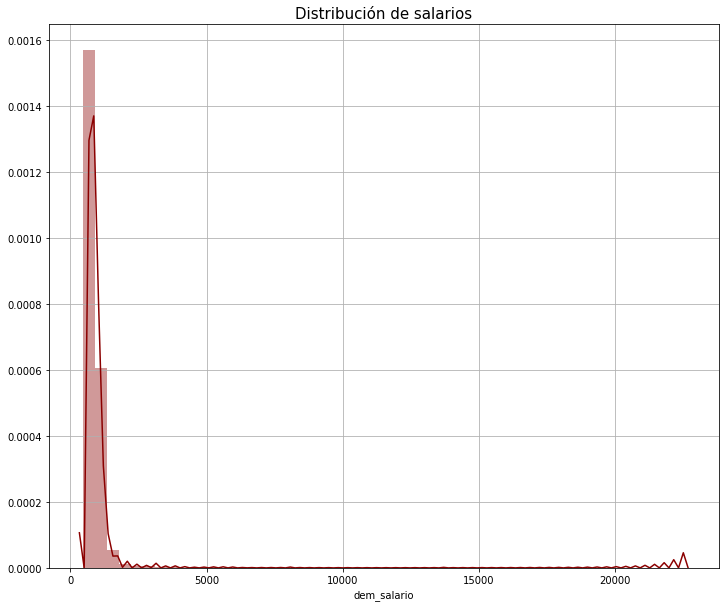

In [321]:
plt.figure(figsize=(12,10))
sns.distplot(train['dem_salario'], color = 'darkred')
plt.title('Distribución de salarios', fontsize = 15)
plt.grid()
plt.show()

Desde este momento ya que vemos la distribución de los salarios, se puede anticipar que nuestro modelo será capaz de predecir mejor salarios que esten por debajo de los 1000 dolares. En la celda de detalles estadisticos de igual manera se observa que 75% de los salarios esta por debajo de 937.00 dolares.

In [322]:
# Observando correlacion
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,llave_cod_cliente,admin_antiguedad_banco,buro_creditos_otros_bancos,buro_score_apc,buro_wallet_share,comp_flag_atm,comp_flag_bpi,comp_flag_cnb,comp_flag_pos,comp_flag_suc,comp_perc_atm,comp_perc_canal_fisico,comp_perc_cnb,comp_perc_bpi,comp_perc_pos,comp_perc_suc,comp_score_digital,comp_txn_atm,comp_txn_bpi,comp_txn_cnb,comp_txn_pos,comp_txn_suc,comp_usd_atm_prom,comp_usd_bpi_prom,comp_usd_cnb_prom,comp_usd_pos_prom,comp_usd_suc_prom,dem_edad,dem_planilla,finc_bal_act,finc_bal_pas,finc_perc_act_tc,finc_perc_pas_tc,finc_sva,finc_tamano_comercial,pdcto_flag_auto,pdcto_flag_cta_ahorro,pdcto_flag_cta_corriente,pdcto_flag_cta_dpf,pdcto_flag_financomer,pdcto_flag_garantizado,pdcto_flag_hipoteca,pdcto_flag_pp,pdcto_flag_seguros,pdcto_flag_tiene_tdc,pdcto_flag_tiene_tdd,pdcto_ivc_actual,dem_salario
llave_cod_cliente,1.000000,-0.758254,-0.174291,-0.226514,-0.100680,0.138750,0.060321,0.026629,0.140629,0.099498,0.093425,0.006581,0.020635,0.017952,0.128637,0.006630,0.031226,0.046648,0.016923,0.016070,0.058464,0.025687,0.028034,0.014458,0.023895,0.043077,0.016998,-0.513234,0.056172,-0.024561,-0.002214,-0.143489,0.145151,-0.062186,-0.024100,0.032488,0.028389,0.143908,-0.022647,-0.005917,-0.018105,-0.047958,-0.108006,-0.048700,-0.057888,0.192912,0.018493,-0.131581
admin_antiguedad_banco,-0.758254,1.000000,0.209162,0.257553,0.084810,-0.192696,-0.077445,-0.035219,-0.191609,-0.111370,-0.136289,-0.017068,-0.009242,-0.017846,-0.175367,0.009927,-0.044108,-0.071765,-0.028313,-0.014704,-0.083888,-0.011463,-0.044084,-0.018785,-0.030940,-0.061655,-0.012760,0.568213,-0.086020,0.025523,0.007150,0.117332,-0.136585,0.082541,0.025926,-0.024903,0.000487,-0.114139,0.018747,-0.009778,0.057285,0.066136,0.045082,0.090615,0.091496,-0.262945,0.007041,0.175915
buro_creditos_otros_bancos,-0.174291,0.209162,1.000000,0.190719,-0.140287,-0.055339,-0.069601,-0.056291,-0.045547,-0.105191,-0.005745,-0.044529,-0.029471,-0.072618,-0.072887,-0.052439,-0.052275,0.014959,-0.028889,-0.044200,-0.027355,-0.112268,0.014034,-0.067479,-0.040417,-0.037305,-0.070088,0.051861,0.092854,0.081947,-0.077002,0.054907,-0.077358,0.039626,0.065066,0.031512,-0.020894,0.057330,0.011863,0.072033,0.016778,0.086538,-0.057889,0.066420,0.056030,-0.068724,0.074994,0.082950
buro_score_apc,-0.226514,0.257553,0.190719,1.000000,0.113717,-0.141366,-0.014103,-0.059924,-0.128065,-0.073080,-0.117567,-0.046207,-0.015333,0.019418,-0.093240,0.037100,-0.007165,-0.049323,-0.016675,-0.077384,-0.030330,-0.051982,-0.069825,0.000231,-0.054073,-0.023753,-0.020626,0.202940,-0.015156,0.092474,-0.022194,0.179213,-0.193323,0.142747,0.085188,0.056810,-0.044334,-0.067160,0.005710,-0.019296,0.006407,0.062046,0.100748,0.168291,0.170942,-0.158426,0.091131,0.161151
buro_wallet_share,-0.100680,0.084810,-0.140287,0.113717,1.000000,-0.289942,-0.074968,-0.006793,-0.255095,-0.032750,-0.247906,-0.018093,0.038226,-0.029381,-0.214597,0.160816,-0.049297,-0.169774,-0.027458,0.001705,-0.123873,-0.017861,-0.170644,-0.018975,-0.001162,-0.120304,-0.041553,0.129369,-0.153836,0.441435,-0.037744,0.696310,-0.641417,0.446172,0.419058,0.083544,-0.104849,-0.160522,-0.009047,-0.038833,-0.008218,0.368584,0.585481,0.190256,0.150850,-0.293347,0.384614,-0.023718
comp_flag_atm,0.138750,-0.192696,-0.055339,-0.141366,-0.289942,1.000000,0.291761,0.063990,0.825109,0.329344,0.824847,0.104311,-0.028988,0.079550,0.622707,-0.318062,0.253946,0.611961,0.196468,0.039919,0.407610,0.137111,0.597108,0.077152,0.038235,0.382085,0.079770,-0.233063,0.575393,-0.196408,0.019841,-0.277181,0.324988,-0.079294,-0.185898,-0.063426,-0.024428,0.333695,-0.013963,-0.002613,0.000281,-0.170188,-0.193675,-0.061209,-0.040273,0.791977,0.014773,-0.087700
comp_flag_bpi,0.060321,-0.077445,-0.069601,-0.014103,-0.074968,0.291761,1.000000,0.086233,0.331865,0.250185,-0.010225,0.063209,-0.009074,0.694818,0.357790,-0.111058,0.749399,0.206004,0.575342,0.062165,0.420998,0.220443,0.184171,0.372687,0.048594,0.404385,0.159400,-0.142984,0.114988,-0.019678,0.115102,-0.052458,0.070789,0.126563,0.001942,

Podemos observar que la mayoria de las variables, si utilizamos este metodo de correlación con respecto a la variable salario, tienen muy poca correlación, la mayoria tiene valores de 0.0 o -0.0.

Vamos a utilizar las variables que tiene valores >= a -0.1 o 0.1 ya que tienen una pequeña correlación positiva o negativa,

Desde este punto podemos observar que linermente es muy dificil realizar un modelo altamente eficaz, ya que ninguna variable tiene una correlación modera o fuerte con el salario.

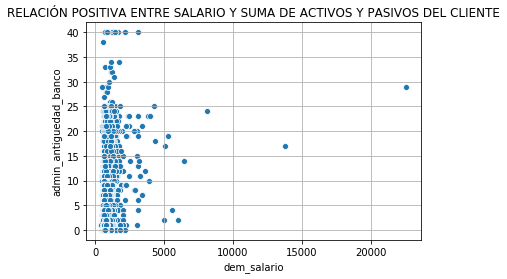

In [323]:
# relación entre salario y variable de activos y pasivos del cliente.
sns.scatterplot(data=train, x='dem_salario', y='admin_antiguedad_banco')
plt.title('RELACIÓN POSITIVA ENTRE SALARIO Y SUMA DE ACTIVOS Y PASIVOS DEL CLIENTE')
plt.grid()
plt.show()

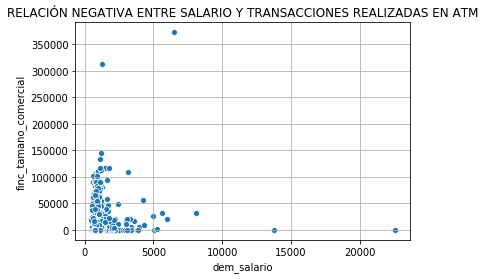

In [324]:
# Relación entre salario y variable de transacciones de atm por el cliente.
sns.scatterplot(data=train, x='dem_salario', y='finc_tamano_comercial')
plt.title('RELACIÓN NEGATIVA ENTRE SALARIO Y TRANSACCIONES REALIZADAS EN ATM')
plt.grid()
plt.show()

In [325]:
# Variables con correlación mayor.
data = train[['admin_antiguedad_banco', 'buro_score_apc','comp_perc_atm','comp_perc_bpi','comp_score_digital','comp_txn_bpi','comp_usd_bpi_prom','comp_usd_pos_prom','dem_edad','dem_planilla','finc_bal_act'
             ,'finc_bal_pas','finc_tamano_comercial','pdcto_flag_auto','pdcto_flag_tiene_tdd','dem_salario']]

In [326]:
# Valores que tiennen una pequeña correlación ya sea positiva o negativa.
corr_data = data.corr()
corr_data.style.background_gradient(cmap='coolwarm')

,admin_antiguedad_banco,buro_score_apc,comp_perc_atm,comp_perc_bpi,comp_score_digital,comp_txn_bpi,comp_usd_bpi_prom,comp_usd_pos_prom,dem_edad,dem_planilla,finc_bal_act,finc_bal_pas,finc_tamano_comercial,pdcto_flag_auto,pdcto_flag_tiene_tdd,dem_salario
admin_antiguedad_banco,1.000000,0.257553,-0.136289,-0.017846,-0.044108,-0.028313,-0.018785,-0.061655,0.568213,-0.086020,0.025523,0.007150,0.025926,-0.024903,-0.262945,0.175915
buro_score_apc,0.257553,1.000000,-0.117567,0.019418,-0.007165,-0.016675,0.000231,-0.023753,0.202940,-0.015156,0.092474,-0.022194,0.085188,0.056810,-0.158426,0.161151
comp_perc_atm,-0.136289,-0.117567,1.000000,-0.096403,-0.040786,-0.044483,-0.052077,0.056246,-0.149647,0.593334,-0.188974,-0.035167,-0.188727,-0.078644,0.676972,-0.130686
comp_perc_bpi,-0.017846,0.019418,-0.096403,1.000000,0.626317,0.541287,0.442866,0.124478,-0.049353,0.016089,0.018053,0.165151,0.047448,0.047975,0.055438,0.117816
comp_score_digital,-0.044108,-0.007165,-0.040786,0.626317,1.000000,0.770601,0.443092,0.438712,-0.113003,0.119250,-0.009551,0.127052,0.013886,0.027859,0.182614,0.109411
comp_txn_bpi,-0.028313,-0.016675,-0.044483,0.541287,0.770601,1.000000,0.468849,0.396597,-0.099369,0.088418,0.012598,0.090620,0.028633,0.036590,0.139502,0.102152
comp_usd_bpi_prom,-0.018785,0.000231,-0.052077,0.442866,0.443092,0.468849,1.000000,0.239555,-0.017386,0.002908,0.009586,0.318149,0.067099,0.033490,0.041466,0.125597
comp_usd_pos_prom,-0.061655,-0.023753,0.056246,0.124478,0.438712,0.396597,0.239555,1.000000,-0.097346,0.184318,-0.056951,0.107183,-0.035460,-0.007875,0.293442,0.103169
dem_edad,0.568213,0.202940,-0.149647,-0.049353,-0.113003,-0.099369,-0.017386,-0.097346,1.000000,-0.157963,-0.018166,0.049948,-0.008446,-0.030046,-0.289046,0.122621
dem_planilla,-0.086020,-0.015156,0.593334,0.016089,0.119250,0.088418,0.002908,0.184318,-0.157963,1.000000,-0.123318,-0.039717,-0.126206,-0.055665,0.499263,-0.115481


<img src="correlacion.png"/>

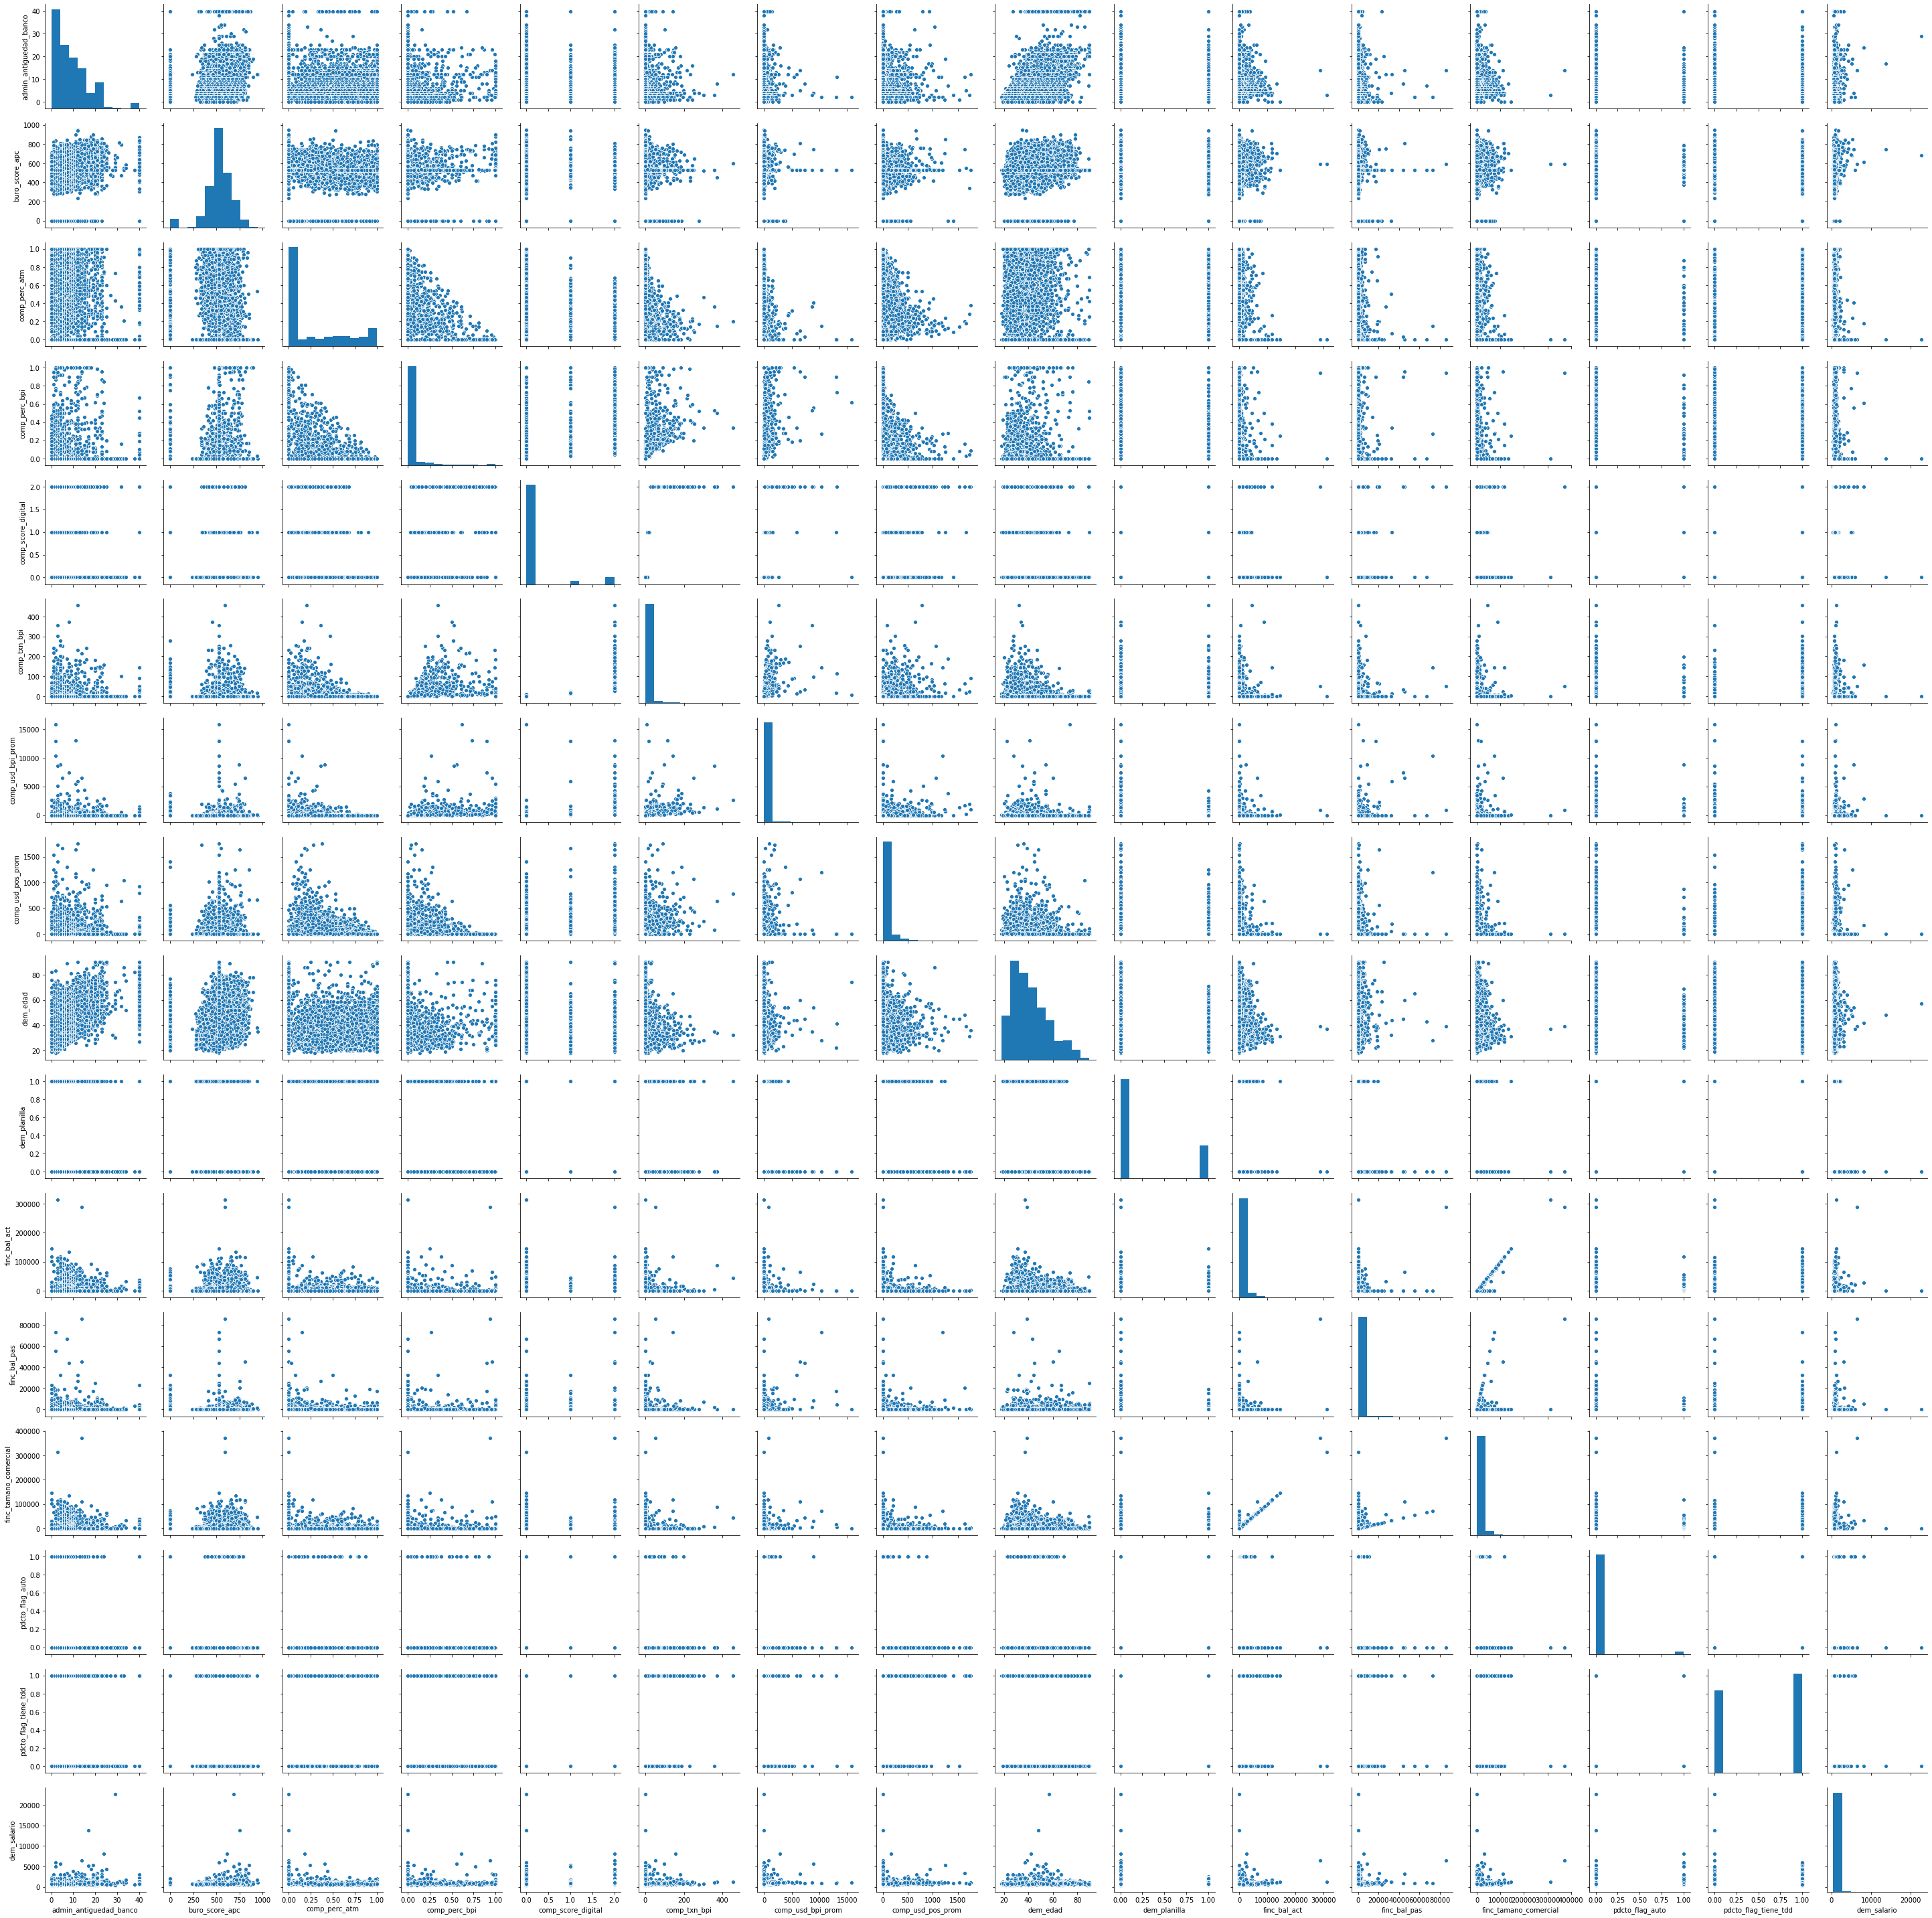

In [327]:
# Observando correlación entre variable de salario y predictoras.
sns.pairplot(data)
plt.show()

Vamosa  eliminar de igual manera variables discretizadas o con contenido binario, ya que no aportan realmente nada al modelo, ni indican alguan tendencia.

In [328]:
# Borrando variables que poseen valores binarios o discretizados ya que no aportan un comportamiento lineal positivo o negativo.
data = data.drop(columns=['comp_score_digital', 'pdcto_flag_tiene_tdd', 'pdcto_flag_auto', 'dem_planilla'])

<img src="MAPE.png"/>

La metrica que vamos a estar utilizando es el **Mean Absolute Percentage error**, para evaluar las predicciones.

## **3- Modelo Predictivos Basado en Correlación**

In [329]:
# Train _test Split
X = data.drop(columns=['dem_salario'])
y = data['dem_salario']

In [330]:
# Max Min Scaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [331]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### **3.1 Regresión lineal**

MAPE 19.593120758845682 %

Durbin-watson: 2.0634452096991565


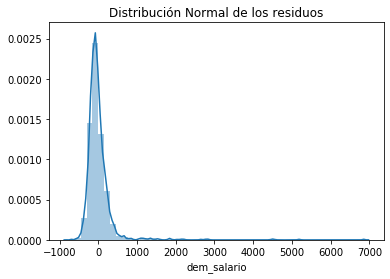

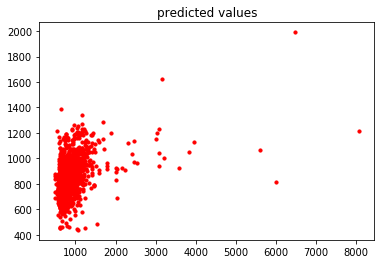

    dem_salario  salario_estimado
0        613.57        715.107923
1       1107.00       1006.382143
2        964.70        959.484878
3        687.40        872.040277
4        661.07        584.284724
5        697.96        681.668672
6       1030.00        717.095022
7        798.72        918.502059
8       1176.09       1059.774046
9       1023.21        742.805155
10      1052.19       1052.731215
11       766.40       1021.150983
12       634.62        661.602410
13       766.40        818.409554
14       670.35        910.341287


LinearRegression()

In [332]:
# Modelo de Regresión lineal con variables con mayor correlación (aunque baja).

def linear_regression(X_train, X_test, y_train, y_test):
  # Modelo
  lm = LinearRegression()
  lm.fit(X_train, y_train)
  pred = lm.predict(X_test)
    
  # Metricas 
  print('MAPE',mean_absolute_percentage_error(y_true=y_test, y_pred=pred)*100,'%')
  print()
    
  # Durbin-watson
  residual = (y_test - pred)
  print('Durbin-watson:',durbin_watson(residual))
    
  # Residuos
  sns.distplot(residual)
  plt.title('Distribución Normal de los residuos')
  plt.show()
  
  # Predicted Values
  plt.scatter(y_test, pred, s=10, color='r')
  plt.title('predicted values')
  plt.show()

  # Dataframe
  prediction = lm.predict(X_test)
  prediction = pd.DataFrame(prediction, columns=['salario_estimado'])


  # Valores actuales.
  y_test_l = pd.DataFrame(y_test)
  y_test_l = y_test_l.reset_index(drop=True)

  # Dataframe predicciones y actuales.
  dataframe = pd.concat([y_test_l, prediction], axis=1)

  print(dataframe.head(15))

  return lm

# Modelo de Regresión linear
lm = linear_regression(X_train, X_test, y_train, y_test)
lm

Podemos observar que nuestro modelo predice bastante bien, los salarios, con rangos bastantes cercanos, ya que según nuestra
metrica tiene alrededor de 20% de error. Errores más comunes son salarios arribas de 1000$ ya que nuestros datos el 75 porciento esta en el rango de 975 dolares o menos, por lo que nuestro modelo le cuesta más predecir salarios altos.

### **3.2- Redes Neuronales Artificiales**

In [333]:
# ANN
def ann(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    model.add(keras.layers.Dense(11, input_shape=(11,)))
    model.add(keras.layers.Dense(1, activation='relu'))
    model.compile(keras.optimizers.Adam(lr=0.1), 'mean_absolute_percentage_error')

    # Compilar modelo
    history = model.fit(X_train, y_train, batch_size=8, epochs=7)

    # prediction
    ann_prediction = model.predict(X_test)
    ann_prediction = pd.DataFrame(ann_prediction, columns=['salario_estimado'])

    # Valores actuales.
    y_test_ann = pd.DataFrame(y_test)
    y_test_ann = y_test_ann.reset_index(drop=True)

    # Dataframe predicciones y actuales.
    ypred_ann = pd.concat([y_test_ann, ann_prediction], axis=1)

    # Resultado de ANN.
    y_true_ann = ypred_ann['dem_salario']
    y_pred_ann = ypred_ann['salario_estimado']

    print('MAPE:',mean_absolute_percentage_error(y_true=y_true_ann, y_pred=y_pred_ann)*100,'%')
    print()
    print('VALORES ACTUALES VS PREDICCIONES ')
    print(ypred_ann.head(15))
    
    return model

# llamando función de ANN
ann_model = ann(X_train, X_test, y_train, y_test)
ann_model

Epoch 1/7
418/418 [==============================] - 0s 819us/step - loss: 100.0000
Epoch 2/7
418/418 [==============================] - 0s 766us/step - loss: 100.0000
Epoch 3/7
418/418 [==============================] - 0s 855us/step - loss: 100.0000
Epoch 4/7
418/418 [==============================] - 0s 755us/step - loss: 100.0000
Epoch 5/7
418/418 [==============================] - 0s 809us/step - loss: 100.0000
Epoch 6/7
418/418 [==============================] - 0s 795us/step - loss: 100.0000
Epoch 7/7
418/418 [==============================] - 0s 654us/step - loss: 100.0000
MAPE: 100.0 %

VALORES ACTUALES VS PREDICCIONES 
    dem_salario  salario_estimado
0        613.57               0.0
1       1107.00               0.0
2        964.70               0.0
3        687.40               0.0
4        661.07               0.0
5        697.96               0.0
6       1030.00               0.0
7        798.72               0.0
8       1176.09               0.0
9       1023.21        

### **3.3- Random Forest Regressor**

In [334]:
def random_forest_regressor(X_train, X_test, y_train, y_test):
     rfr = RandomForestRegressor()
     rfr.fit(X_train, y_train)
     pred = rfr.predict(X_test)

     # Metricas 
     print('MAPE',mean_absolute_percentage_error(y_true=y_test, y_pred=pred)*100,'%')
     print()

     # Dataframe
     rfr_prediction = rfr.predict(X_test)
     rfr_prediction = pd.DataFrame(rfr_prediction, columns=['salario_estimado'])


     # Valores actuales.
     y_test_rfr = pd.DataFrame(y_test)
     y_test_rfr = y_test_rfr.reset_index(drop=True)

     # Dataframe predicciones y actuales.
     dataframe = pd.concat([y_test_rfr, rfr_prediction], axis=1)

     print(dataframe.head(15))

     return rfr


# LLamando a la función
rfr = random_forest_regressor(X_train, X_test, y_train, y_test)
rfr

MAPE 18.306033984904207 %

    dem_salario  salario_estimado
0        613.57          740.6139
1       1107.00          941.9564
2        964.70         1018.7017
3        687.40          776.8770
4        661.07          821.6805
5        697.96          682.2411
6       1030.00          761.6899
7        798.72          763.5327
8       1176.09         1645.9907
9       1023.21          716.7050
10      1052.19         1059.4019
11       766.40         1012.2487
12       634.62          654.2336
13       766.40          692.0614
14       670.35          775.3458


RandomForestRegressor()

## **4- Modelos Predictivos extrayendo variables con p-valor estadisticamente significativo**

In [335]:
# Salarios 
train.dem_salario.value_counts()

618.50     258
626.40     239
766.40     177
687.40     173
791.10     112
          ... 
713.69       1
595.54       1
996.60       1
886.25       1
1009.13      1
Name: dem_salario, Length: 3341, dtype: int64

In [336]:
def continous_filter(df, low_exclusive = 2, high_inclusive = 15):
    """
    Función que retorna las columnas que tienen valores menores o iguales a las categorias
    """ 
    list_of_features = []
    for i in df.columns:
        if low_exclusive == high_inclusive:
            if df[i].nunique() <= low_exclusive :
                list_of_features.append(i)
        else:
            if df[i].nunique() <= high_inclusive and df[i].nunique() > low_exclusive :
                list_of_features.append(i)
    return list_of_features

In [337]:
# elegimos 3 porque no queremos variables binarias ni la de score digital ya que no aportan en nada al salario.
remainder_cols = continous_filter(train, 3, len(train))
print('# Variables continuas con más de 3 atributos) = ',len(remainder_cols))

# Variables continuas con más de 3 atributos) =  29


In [338]:
n_rows = len(train)

# Atributos que tengan más de 3 clases 
train_df_cols = train[remainder_cols]

In [339]:
# Extrayendo los atributos más importantes.
target_df = train['dem_salario']
# target_df_log = np.log(target_df)
f, p_val = f_regression(train_df_cols,target_df)

In [340]:
# Extrayendo Valores que tienen el p-valor menor de 0.05 para hacerlo estadisticamente significativos.
f_reg_df = pd.DataFrame(np.array([f, p_val]).T, index = train_df_cols.columns, columns = ['f-statistic', 'p-value'])
continous_stored_features = f_reg_df[f_reg_df['p-value'] < 0.05].sort_values(by = 'f-statistic', ascending = False)
continous_stored_features

,f-statistic,p-value
dem_salario,2.201465e+17,0.000000e+00
admin_antiguedad_banco,1.592243e+02,5.895625e-36
buro_score_apc,1.329363e+02,2.259270e-30
finc_bal_pas,1.049403e+02,2.192455e-24
llave_cod_cliente,8.784697e+01,1.045706e-20
comp_perc_atm,8.663506e+01,1.909609e-20
finc_tamano_comercial,8.129986e+01,2.713598e-19
comp_usd_bpi_prom,7.991217e+01,5.415967e-19
dem_edad,7.611292e+01,3.598506e-18
comp_perc_bpi,7.018265e+01,6.952672e-17


Con este paso hemos encontrado las variables estadisticamente significativas con respecto a la variable objetivo, y que su p valor sea < 0.05

In [341]:
# construyendo dataframe con los valores estadisticamente sifnicativos.
p_train = train[['admin_antiguedad_banco', 'buro_score_apc', 'finc_bal_pas', 'comp_perc_atm','finc_tamano_comercial','comp_usd_bpi_prom','dem_edad','comp_perc_bpi','finc_bal_act','comp_usd_pos_prom','comp_txn_bpi','finc_perc_pas_tc','comp_txn_pos','finc_sva','comp_usd_suc_prom','comp_txn_atm','comp_txn_suc','finc_perc_act_tc','dem_salario']]

In [342]:
# Train _test Split
X_p_train = p_train.drop(columns=['dem_salario'])
y_p_train = p_train['dem_salario']

# Max Min Scaler
sc = MinMaxScaler()
X_p_train = sc.fit_transform(X_p_train)
         
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_p_train,y_p_train, test_size=0.33, random_state=42)

### **4.1- Regresión lineal**

MAPE 19.792274797647185 %

Durbin-watson: 2.067799870062239


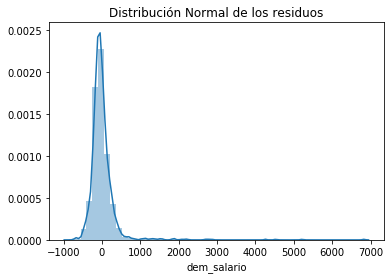

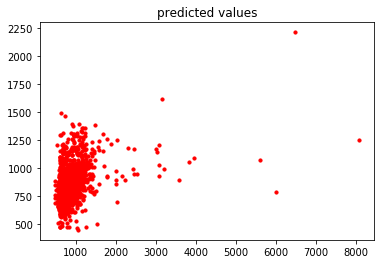

    dem_salario  salario_estimado
0        613.57       1076.868121
1       1107.00        974.590190
2        964.70       1297.526493
3        687.40        885.286520
4        661.07        572.095569
5        697.96        686.617612
6       1030.00        695.933272
7        798.72        871.320807
8       1176.09       1048.039852
9       1023.21        743.835166
10      1052.19       1040.466386
11       766.40        978.009638
12       634.62        665.544205
13       766.40        778.715956
14       670.35        902.063859


LinearRegression()

In [343]:
# Modelo de Regresión lineal con valores estadisticamente sifnicantes.
def linear_regression_p(X_train, X_test, y_train, y_test):
  # Modelo
  lmp = LinearRegression()
  lmp.fit(X_train, y_train)
  pred = lmp.predict(X_test)

  # Metricas 
  print('MAPE',mean_absolute_percentage_error(y_true=y_test, y_pred=pred)*100,'%')
  print()

    # Durbin-watson
  residual = (y_test - pred)
  print('Durbin-watson:',durbin_watson(residual))
    
  # Residuos
  sns.distplot(residual)
  plt.title('Distribución Normal de los residuos')
  plt.show()
  
  # Predicted Values
  plt.scatter(y_test, pred, s=10, color='r')
  plt.title('predicted values')
  plt.show()
  # Dataframe
  prediction = lmp.predict(X_test)
  prediction = pd.DataFrame(prediction, columns=['salario_estimado'])


  # Valores actuales.
  y_test_p = pd.DataFrame(y_test)
  y_test_p = y_test_p.reset_index(drop=True)

  # Dataframe predicciones y actuales.
  dataframe = pd.concat([y_test_p, prediction], axis=1)

  print(dataframe.head(15))

  return lm

# Modelo de Regresión linear
lmp = linear_regression_p(X_train, X_test, y_train, y_test)
lmp

### **4.2- ANN**

In [344]:
# ANN
def ann(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    model.add(keras.layers.Dense(11, input_shape=(18,)))
    model.add(keras.layers.Dense(1, activation='relu'))
    model.compile(keras.optimizers.Adam(lr=0.1), 'mean_absolute_percentage_error')

    # Compilar modelo
    history = model.fit(X_train, y_train, batch_size=8, epochs=7)

    # prediction
    ann_prediction = model.predict(X_test)
    ann_prediction = pd.DataFrame(ann_prediction, columns=['salario_estimado'])


    # Valores actuales.
    y_test_ann = pd.DataFrame(y_test)
    y_test_ann = y_test_ann.reset_index(drop=True)

    # Dataframe predicciones y actuales.
    ypred_ann = pd.concat([y_test_ann, ann_prediction], axis=1)

    # Resultado de ANN.
    y_true_ann = ypred_ann['dem_salario']
    y_pred_ann = ypred_ann['salario_estimado']

    print('MAPE:',mean_absolute_percentage_error(y_true=y_true_ann, y_pred=y_pred_ann)*100,'%')
    print()
    print('VALORES ACTUALES VS PREDICCIONES ')
    print(ypred_ann.head(15))
    
    return model

# llamando función de ANN
ann_model_p = ann(X_train, X_test, y_train, y_test)
ann_model_p

Epoch 1/7
418/418 [==============================] - 0s 791us/step - loss: 22.6315
Epoch 2/7
418/418 [==============================] - 0s 797us/step - loss: 16.5925
Epoch 3/7
418/418 [==============================] - 0s 815us/step - loss: 16.0858
Epoch 4/7
418/418 [==============================] - 0s 760us/step - loss: 16.1295
Epoch 5/7
418/418 [==============================] - 0s 707us/step - loss: 16.1967
Epoch 6/7
418/418 [==============================] - 0s 787us/step - loss: 15.9818
Epoch 7/7
418/418 [==============================] - 0s 904us/step - loss: 15.9148
MAPE: 16.430026109097017 %

VALORES ACTUALES VS PREDICCIONES 
    dem_salario  salario_estimado
0        613.57        757.700989
1       1107.00        825.376404
2        964.70        827.562683
3        687.40        845.522583
4        661.07        688.885742
5        697.96        690.335205
6       1030.00        730.856995
7        798.72        794.857666
8       1176.09        859.985168
9       1023.21  

### **4.3 Random Forest Regressor**

In [345]:
def random_forest_regressor(X_train, X_test, y_train, y_test):
     rfr_r = RandomForestRegressor()
     rfr_r.fit(X_train, y_train)
     pred = rfr_r.predict(X_test)

     # Metricas 
     print('MAPE',mean_absolute_percentage_error(y_true=y_test, y_pred=pred)*100,'%')
     print()

     # Dataframe
     rfr_prediction = rfr_r.predict(X_test)
     rfr_prediction = pd.DataFrame(rfr_prediction, columns=['salario_estimado'])


     # Valores actuales.
     y_test_rfr = pd.DataFrame(y_test)
     y_test_rfr = y_test_rfr.reset_index(drop=True)

     # Dataframe predicciones y actuales.
     dataframe = pd.concat([y_test_rfr, rfr_prediction], axis=1)

     print(dataframe.head(15))

     return rfr_r


# LLamando a la función
rfr_r = random_forest_regressor(X_train, X_test, y_train, y_test)
rfr_r

MAPE 17.659201859189363 %

    dem_salario  salario_estimado
0        613.57          721.4359
1       1107.00         1039.0442
2        964.70         1003.8795
3        687.40          794.9184
4        661.07          730.8170
5        697.96          688.4891
6       1030.00          741.9637
7        798.72          875.5021
8       1176.09         1540.9384
9       1023.21          682.1383
10      1052.19         1037.3580
11       766.40         1308.3844
12       634.62          725.4442
13       766.40          684.1516
14       670.35          853.5143


RandomForestRegressor()

## **5 Modelo utilizando todos los atributos.**

In [346]:
# Train _test Split
X = train.drop(columns=['dem_salario'])
y = train['dem_salario']

# Max Min Scaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
         
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### **5.1- Linear regression**

MAPE 18.794119397621117 %

Durbin-watson: 2.0641758380298327


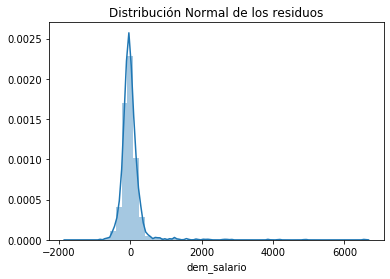

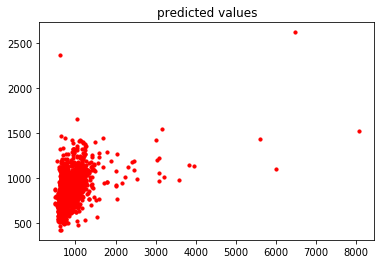

    dem_salario  salario_estimado
0        613.57       1086.204545
1       1107.00       1092.268500
2        964.70       1321.048470
3        687.40        835.983037
4        661.07        519.555992
5        697.96        669.021290
6       1030.00        739.645365
7        798.72        880.732150
8       1176.09       1069.646524
9       1023.21        733.325761
10      1052.19       1045.586163
11       766.40        906.445699
12       634.62        599.180133
13       766.40        792.364030
14       670.35        919.808891


LinearRegression()

In [347]:
def linear_regression(X_train, X_test, y_train, y_test):
  # Modelo
  lm_all = LinearRegression()
  lm_all.fit(X_train, y_train)
  pred = lm_all.predict(X_test)

  # Metricas 
  print('MAPE',mean_absolute_percentage_error(y_true=y_test, y_pred=pred)*100,'%')
  print()

   # Durbin-watson
  residual = (y_test - pred)
  print('Durbin-watson:',durbin_watson(residual))
    
  # Residuos
  sns.distplot(residual)
  plt.title('Distribución Normal de los residuos')
  plt.show()
  
  # Predicted Values
  plt.scatter(y_test, pred, s=10, color='r')
  plt.title('predicted values')
  plt.show()
  
  # Dataframe
  prediction = lm_all.predict(X_test)
  prediction = pd.DataFrame(prediction, columns=['salario_estimado'])


  # Valores actuales.
  y_test_l = pd.DataFrame(y_test)
  y_test_l = y_test_l.reset_index(drop=True)

  # Dataframe predicciones y actuales.
  dataframe = pd.concat([y_test_l, prediction], axis=1)

  print(dataframe.head(15))

  return lm_all



# Llammando a regresion lineal con todos los datos
lm_all = linear_regression(X_train, X_test, y_train, y_test)
lm_all

### **5.2- Artificial neural network**

In [348]:
# ANN
def ann(X_train, X_test, y_train, y_test):
    model_all = keras.Sequential()
    model_all.add(keras.layers.Dense(11, input_shape=(47,)))
    model_all.add(keras.layers.Dense(1, activation='relu'))
    model_all.compile(keras.optimizers.Adam(lr=0.1), 'mean_absolute_percentage_error')

    # Compilar modelo
    history = model_all.fit(X_train, y_train, batch_size=8, epochs=7)

    # prediction
    ann_prediction = model_all.predict(X_test)
    ann_prediction = pd.DataFrame(ann_prediction, columns=['salario_estimado'])


    # Valores actuales.
    y_test_ann = pd.DataFrame(y_test)
    y_test_ann = y_test_ann.reset_index(drop=True)

    # Dataframe predicciones y actuales.
    ypred_ann = pd.concat([y_test_ann, ann_prediction], axis=1)

    # Resultado de ANN.
    y_true_ann = ypred_ann['dem_salario']
    y_pred_ann = ypred_ann['salario_estimado']

    print('MAPE:',mean_absolute_percentage_error(y_true=y_true_ann, y_pred=y_pred_ann)*100,'%')
    print()
    print('VALORES ACTUALES VS PREDICCIONES ')
    print(ypred_ann.head(15))
    
    return model_all


# Modelo con todas las variables.
model_all = ann(X_train, X_test, y_train, y_test)
model_all

Epoch 1/7
418/418 [==============================] - 0s 826us/step - loss: 22.2621
Epoch 2/7
418/418 [==============================] - 0s 826us/step - loss: 16.6070
Epoch 3/7
418/418 [==============================] - 0s 935us/step - loss: 16.2130
Epoch 4/7
418/418 [==============================] - 0s 840us/step - loss: 15.8862
Epoch 5/7
418/418 [==============================] - 0s 923us/step - loss: 15.8759
Epoch 6/7
418/418 [==============================] - 0s 775us/step - loss: 15.7322
Epoch 7/7
418/418 [==============================] - 0s 695us/step - loss: 15.6023
MAPE: 15.579867683741627 %

VALORES ACTUALES VS PREDICCIONES 
    dem_salario  salario_estimado
0        613.57        702.788147
1       1107.00        885.938843
2        964.70        821.526245
3        687.40        863.221985
4        661.07        591.822266
5        697.96        644.138184
6       1030.00        695.322571
7        798.72        814.150635
8       1176.09        881.189148
9       1023.21  

### **5.3- random Forest Regressor**

In [349]:
def random_forest_regressor(X_train, X_test, y_train, y_test):
     rfr_f = RandomForestRegressor()
     rfr_f.fit(X_train, y_train)
     pred = rfr_f.predict(X_test)

     # Metricas 
     print('MAPE',mean_absolute_percentage_error(y_true=y_test, y_pred=pred)*100,'%')
     print()

     # Dataframe
     rfr_prediction = rfr_f.predict(X_test)
     rfr_prediction = pd.DataFrame(rfr_prediction, columns=['salario_estimado'])


     # Valores actuales.
     y_test_rfr = pd.DataFrame(y_test)
     y_test_rfr = y_test_rfr.reset_index(drop=True)

     # Dataframe predicciones y actuales.
     dataframe = pd.concat([y_test_rfr, rfr_prediction], axis=1)

     print(dataframe.head(15))

     return rfr_f


# LLamando a la función
rfr_f = random_forest_regressor(X_train, X_test, y_train, y_test)
rfr_f

MAPE 16.26381253711008 %

    dem_salario  salario_estimado
0        613.57          664.7904
1       1107.00         1093.8159
2        964.70          952.0410
3        687.40          795.4588
4        661.07          682.9554
5        697.96          669.7273
6       1030.00          720.3647
7        798.72          881.8918
8       1176.09         1383.0858
9       1023.21          709.1095
10      1052.19         1186.5238
11       766.40         1251.3375
12       634.62          653.5666
13       766.40          720.7402
14       670.35          848.1056


RandomForestRegressor()

## 6 analísis Intuitivo

Vamos a utilizar las variables que muestran directamente el valor de activos o pasivos del cliente sin saber cuales estos son, ya que estos afectan direcamente cualquier ingreso que tenga el cliente.

In [350]:
intuitivo = train[['finc_bal_pas', 'finc_bal_act', 'finc_tamano_comercial','dem_salario']]

In [351]:
# Train _test Split
X_intuitivo = intuitivo.drop(columns=['dem_salario'])
y_intuitivo = intuitivo['dem_salario']

# Max Min Scaler
sc = MinMaxScaler()
X_intuitivo = sc.fit_transform(X_intuitivo)
         
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_intuitivo,y_intuitivo, test_size=0.33, random_state=42)

### **6.1- Regresión lineal**

MAPE 88673370.93072397 %

Durbin-watson: 2.0000000004650826


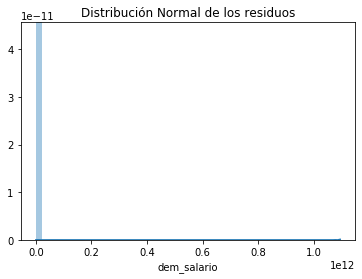

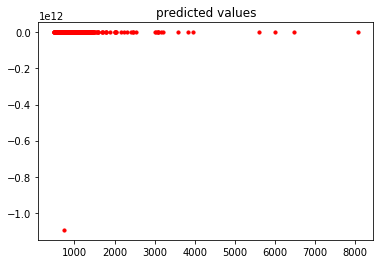

    dem_salario  salario_estimado
0        613.57        831.673875
1       1107.00        873.673875
2        964.70        831.673875
3        687.40        937.173875
4        661.07        831.815599
5        697.96        833.931688
6       1030.00        851.298875
7        798.72        841.517625
8       1176.09        831.674088
9       1023.21        834.726610
10      1052.19        853.861375
11       766.40        841.173875
12       634.62        832.695360
13       766.40        843.673875
14       670.35        831.881761


LinearRegression()

In [352]:
def linear_regression(X_train, X_test, y_train, y_test):
  # Modelo
  lm_in = LinearRegression()
  lm_in.fit(X_train, y_train)
  pred = lm_in.predict(X_test)

  # Metricas 
  print('MAPE',mean_absolute_percentage_error(y_true=y_test, y_pred=pred)*100,'%')
  print()

   # Durbin-watson
  residual = (y_test - pred)
  print('Durbin-watson:',durbin_watson(residual))
    
  # Residuos
  sns.distplot(residual)
  plt.title('Distribución Normal de los residuos')
  plt.show()
  
  # Predicted Values
  plt.scatter(y_test, pred, s=10, color='r')
  plt.title('predicted values')
  plt.show()
  
  # Dataframe
  prediction = lm_in.predict(X_test)
  prediction = pd.DataFrame(prediction, columns=['salario_estimado'])


  # Valores actuales.
  y_test_l = pd.DataFrame(y_test)
  y_test_l = y_test_l.reset_index(drop=True)

  # Dataframe predicciones y actuales.
  dataframe = pd.concat([y_test_l, prediction], axis=1)

  print(dataframe.head(15))

  return lm_in



# Llammando a regresion lineal con todos los datos
lm_in = linear_regression(X_train, X_test, y_train, y_test)
lm_in

###  **6.2 Redes neuronales**

In [353]:
# ANN
def ann(X_train, X_test, y_train, y_test):
    model_in = keras.Sequential()
    model_in.add(keras.layers.Dense(3, input_shape=(3,)))
    model_in.add(keras.layers.Dense(1, activation='relu'))
    model_in.compile(keras.optimizers.Adam(lr=0.1), 'mean_absolute_percentage_error')

    # Compilar modelo
    history = model_in.fit(X_train, y_train, batch_size=8, epochs=7)

    # prediction
    ann_prediction = model_in.predict(X_test)
    ann_prediction = pd.DataFrame(ann_prediction, columns=['salario_estimado'])


    # Valores actuales.
    y_test_ann = pd.DataFrame(y_test)
    y_test_ann = y_test_ann.reset_index(drop=True)

    # Dataframe predicciones y actuales.
    ypred_ann = pd.concat([y_test_ann, ann_prediction], axis=1)

    # Resultado de ANN.
    y_true_ann = ypred_ann['dem_salario']
    y_pred_ann = ypred_ann['salario_estimado']

    print('MAPE:',mean_absolute_percentage_error(y_true=y_true_ann, y_pred=y_pred_ann)*100,'%')
    print()
    print('VALORES ACTUALES VS PREDICCIONES ')
    print(ypred_ann.head(15))
    
    return model_in


# Modelo con todas las variables.
model_in = ann(X_train, X_test, y_train, y_test)
model_in

Epoch 1/7
418/418 [==============================] - 0s 561us/step - loss: 100.0000
Epoch 2/7
418/418 [==============================] - 0s 640us/step - loss: 100.0000
Epoch 3/7
418/418 [==============================] - 0s 703us/step - loss: 100.0000
Epoch 4/7
418/418 [==============================] - 0s 659us/step - loss: 100.0000
Epoch 5/7
418/418 [==============================] - 0s 598us/step - loss: 100.0000
Epoch 6/7
418/418 [==============================] - 0s 674us/step - loss: 100.0000
Epoch 7/7
418/418 [==============================] - 0s 636us/step - loss: 100.0000
MAPE: 100.0 %

VALORES ACTUALES VS PREDICCIONES 
    dem_salario  salario_estimado
0        613.57               0.0
1       1107.00               0.0
2        964.70               0.0
3        687.40               0.0
4        661.07               0.0
5        697.96               0.0
6       1030.00               0.0
7        798.72               0.0
8       1176.09               0.0
9       1023.21        

Los modelos creados con estas variables estan muy sesgados, por lo que las predicciones son bastante malas.

### **Base Prueba**

En esta sección vamos a utilizar el modelo predictivo creado para, predecir el salario de la base de datos
de prueba ó test (base_prueba).

In [354]:
# Creando Test para predecir con variables 
test_data = test[['admin_antiguedad_banco', 'buro_score_apc','comp_perc_atm','comp_perc_bpi','comp_txn_bpi','comp_usd_bpi_prom','comp_usd_pos_prom','dem_edad','finc_bal_act'
             ,'finc_bal_pas','finc_tamano_comercial']]

# Guardadno Key del cliente.
costumer_key = test[['llave_cod_cliente']]

In [355]:
# Replacing NaN Values with mean
test_data['buro_score_apc'] = test_data.buro_score_apc.fillna(test_data.buro_score_apc.mean())
test_data['comp_txn_bpi'] = test_data.comp_txn_bpi.fillna(test_data.comp_txn_bpi.mean())
test_data['comp_usd_bpi_prom'] = test_data.comp_usd_bpi_prom.fillna(test_data.comp_usd_bpi_prom.mean())
test_data['comp_usd_pos_prom'] = test_data.comp_usd_pos_prom.fillna(test_data.comp_usd_pos_prom.mean())

In [356]:
# Normalizando los valores de las columnas elegidas para mejorar el accuracy del modelo.
test_data = sc.fit_transform(test_data)

In [357]:
# Creando data alternativa para trabajar.
df = test_data

In [358]:
# Aplicando modelo de regresión lineal.
test_predictions = lm.predict(df)

# Resultado de predicciones de salarios.
salarios = pd.DataFrame(test_predictions)
salarios.columns = ['dem_salario']

# Archivo final
base_prueba_evaluado = costumer_key.join(salarios)

In [359]:
# Vista previa de archivo evaluado. LR
base_prueba_evaluado

,llave_cod_cliente,dem_salario
0,484,975.149764
1,622,1036.510460
2,845,879.863613
3,884,881.502082
4,961,918.361135
...,...,...
19995,99063228,664.914757
19996,99063243,820.725154
19997,99063294,768.485569
19998,99063295,603.401957


In [360]:
# A CSV de jupyter Notebook a maquína local.
base_prueba_evaluado.to_csv(r'C:\\Users\\Asus\\Desktop\\BANISTMO\\base_prueba_evaluado.csv', index=False)

### 6- Conclusiones

La mayoria de nuestros modelos han entregado un MAPE entre 15% - 20% de error, el cual es bastante bueno.
Sin embargo, los datos suministrados no son buenos para predecir la variable del salario, ya que no tienen ninguna correlación tan fuerte con la variable objetivo.

En esta ocasión, no ha sido por modelos, sino por baja calidad de datos, que nuestro modelo no se puede mejorar.

Existen algunas técnicas de transformación como logaritmicas entre otras que siven para mejorar la correlación, pero en este caso al ser tan baja no contribuia o mejoraba demasiado el modelo.

Hemos elegido el modelo de regresión lineal con selección de atributos, ya que este contiene menor información de variables, y es casi tan bueno como los demás modelos realizados, sin variables que no aportan nada al modelo, como pudiese ser en el caso del modelo con todas las variables. O en caso de las redes neuronales ya que necesitan un poco más de poder computacional y su tiempo de entrenamiento es un poco más lento. Además que hemos realizadoe el test de normalidad de los residuos y el test de Durbin watson, y los residuos estan normalmente distribuidos y el resultado del test ha sido de 2.06, lo que demuestra que no hay problemas de multicolinealidad (valores buenos entre 1.5 y 2.5).

Nuestro modelo es bastante bueno para predecir salarios debajo de los 1000 dolares, ya que la mayoria de los datos (75 porciento) de los datos de entrenamiento estaban por debajo de 975 dolares.

El modelo intuitivo realmente no es tan bueno, ya que a pesar de que los resultados son parecidos a los demás, estaban muy sesgados a predecir valores bajos de salarios.

La cantidad de datos tampoco era suficiente como para realizar un modelo más robusto-